尝试用龙格-库塔方法生成混沌摆的运动点。两个摆的长度、质量分别为l1, l2, m1, m2，角度分别为theta1, theta2，

In [1]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# 系统参数
l1, l2 = 2.0, 1.0       # 摆长 (m)
m1, m2 = 5.0, 2.0       #质量 (kg)
g = 9.81      # 重力加速度 (m/s²)

# 初始条件
theta10 = np.radians(90)   # 初始角度 theta1 (弧度)
theta20 = np.radians(0)    # 初始角度 theta2 (弧度)
v10 = 0.5                  # 初始角速度 v1 (rad/s)
v20 = - 0.5                  # 初始角速度 v2 (rad/s)
delta_t = 0.001             # 时间步长 (s)
num_points = 50000         # 数据点数量

In [3]:
def double_pendulum_equations(state):
    """定义双摆系统的微分方程"""
    theta1, theta2, v1, v2 = state
    dtheta = theta1 - theta2  # Δ = θ₁ - θ₂

    # 定义常量（转动惯量相关系数）
    A1 = m1 * l1**2 / 3 + m2 * l1**2         # A₁ = m₁*l₁²/3 + m₂*l₁²
    A2 = m2 * l2**2 / 3                       # A₂ = m₂*l₂²/3
    B  = m2 * l1 * l2 / 2                     # B   = m₂*l₁*l₂/2

    # 构造右端项
    f1 = - g * (m1*l1/2 + m2*l1) * np.sin(theta1) - B * np.sin(dtheta) * (v2**2)
    f2 =   B * np.sin(dtheta) * (v1**2) + g * (m2*l2/2) * np.sin(theta2)

    # 系数矩阵的行列式
    denom = A1 * A2 - (B * np.cos(dtheta))**2

    # 解耦后计算角加速度
    ddot_theta1 = (A2 * f1 - B * np.cos(dtheta) * f2) / denom
    ddot_theta2 = (-B * np.cos(dtheta) * f1 + A1 * f2) / denom

    return np.array([v1, v2, ddot_theta1, ddot_theta2])

def rk4_step(state, delta_t):
    """四阶龙格-库塔单步计算"""
    k1 = delta_t * double_pendulum_equations(state)
    k2 = delta_t * double_pendulum_equations(state + 0.5*k1)
    k3 = delta_t * double_pendulum_equations(state + 0.5*k2)
    k4 = delta_t * double_pendulum_equations(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6
# 初始化状态向量和时间序列
state = np.array([theta10, theta20, v10, v20])
data = np.zeros((num_points, 5))  # 存储 [t, theta1, theta2, v1, v2]

# 模拟运动
for i in range(num_points):
    t = i * delta_t
    data[i] = [t, state[0], state[1], state[2], state[3]]
    state = rk4_step(state, delta_t)

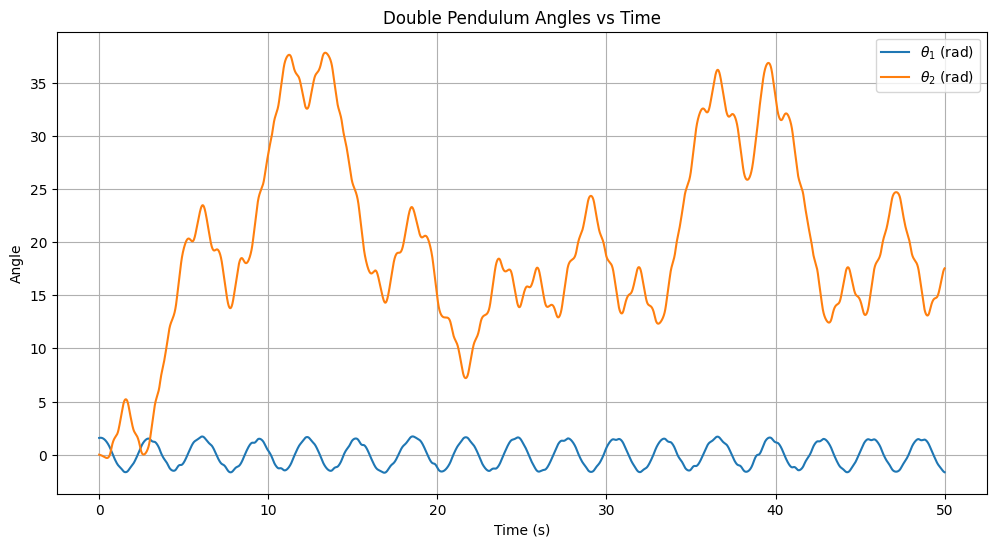

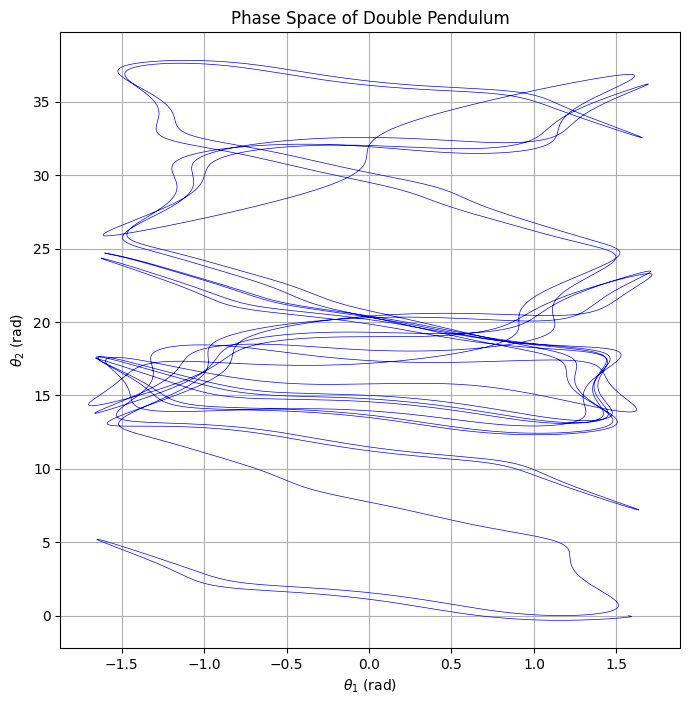

In [4]:
# 从数据中提取变量
t = data[:, 0]
theta1 = data[:, 1]
theta2 = data[:, 2]
v1 = data[:, 3]
v2 = data[:, 4]

# 1. 角度时间序列图
plt.figure(figsize=(12, 6))
plt.plot(t, theta1, label=r'$\theta_1$ (rad)')
plt.plot(t, theta2, label=r'$\theta_2$ (rad)')
plt.xlabel('Time (s)')
plt.ylabel('Angle')
plt.title('Double Pendulum Angles vs Time')
plt.legend()
plt.grid(True)
plt.show()

# 2. 相空间轨迹图 (theta1 和 theta2 的相图)
plt.figure(figsize=(8, 8))
plt.plot(theta1, theta2, lw=0.5, color='blue')
plt.xlabel(r'$\theta_1$ (rad)')
plt.ylabel(r'$\theta_2$ (rad)')
plt.title('Phase Space of Double Pendulum')
plt.grid(True)
plt.show()

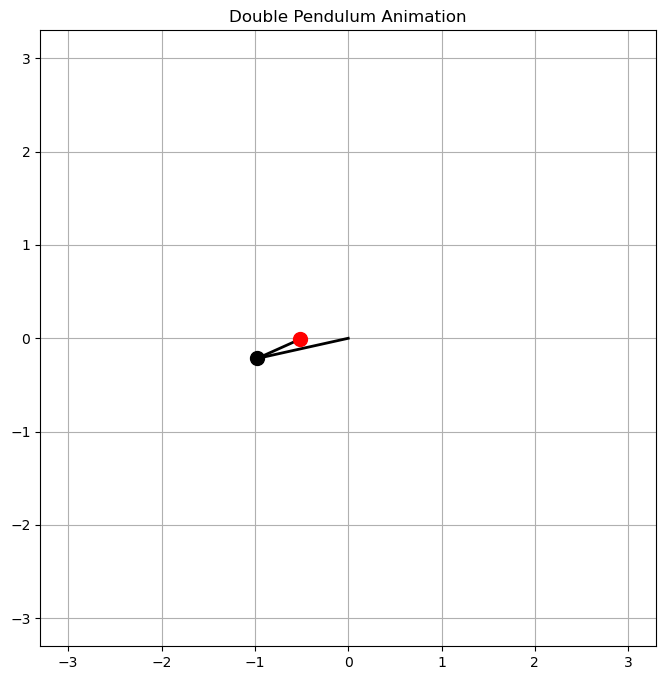

In [23]:
# 双摆运动动画
def update(frame):
    """更新动画帧"""
    # 计算摆锤位置（确保x和y是数组或列表）
    x1 = l1 * np.sin(theta1[frame]) * 0.5
    y1 = -l1 * np.cos(theta1[frame]) * 0.5
    x2 = x1 + l2 * np.sin(theta2[frame]) * 0.5
    y2 = y1 - l2 * np.cos(theta2[frame]) * 0.5
    
    # 更新线段和摆锤（使用 [x] 和 [y] 包装标量为列表）
    line1.set_data([0, x1], [0, y1])
    line2.set_data([x1, x2], [y1, y2])
    ball1.set_data([x1], [y1])  # 修改为列表 [x1], [y1]
    ball2.set_data([x2], [y2])  # 修改为列表 [x2], [y2]
    return line1, line2, ball1, ball2

# 初始化动画画布
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.1*(l1 + l2), 1.1*(l1 + l2))
ax.set_ylim(-1.1*(l1 + l2), 1.1*(l1 + l2))
ax.set_aspect('equal')
ax.grid(True)
ax.set_title('Double Pendulum Animation')

# 绘制初始状态
line1, = ax.plot([], [], 'k-', lw=2)
line2, = ax.plot([], [], 'k-', lw=2)
ball1, = ax.plot([], [], 'ko', markersize=10)
ball2, = ax.plot([], [], 'ro', markersize=10)

# 生成动画 (每帧间隔 delta_t*1000 毫秒，减少帧数以加速)
ani = FuncAnimation(fig, update, frames=range(0, len(t), 50), interval=delta_t*1000, blit=True)

# 保存动画为GIF（可选）
ani.save('double_pendulum.gif', writer='pillow', fps=60)

plt.show()

DoublePendulumLSTM(
  (lstm): LSTM(4, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=4, bias=True)
)


d:\Python 3.11.5\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/15 | Train Loss: 0.014573 | Val Loss: 0.000680
Epoch 2/15 | Train Loss: 0.000078 | Val Loss: 0.000310
Epoch 3/15 | Train Loss: 0.000054 | Val Loss: 0.000258
Epoch 4/15 | Train Loss: 0.000040 | Val Loss: 0.000163
Epoch 5/15 | Train Loss: 0.000039 | Val Loss: 0.000145
Epoch 6/15 | Train Loss: 0.000032 | Val Loss: 0.000159
Epoch 7/15 | Train Loss: 0.000023 | Val Loss: 0.000099
Epoch 8/15 | Train Loss: 0.000029 | Val Loss: 0.000081
Epoch 9/15 | Train Loss: 0.000016 | Val Loss: 0.000075
Epoch 10/15 | Train Loss: 0.000022 | Val Loss: 0.000082
Epoch 11/15 | Train Loss: 0.000020 | Val Loss: 0.000150
Epoch 12/15 | Train Loss: 0.000023 | Val Loss: 0.000030
Epoch 13/15 | Train Loss: 0.000013 | Val Loss: 0.000032
Epoch 14/15 | Train Loss: 0.000018 | Val Loss: 0.000027
Epoch 15/15 | Train Loss: 0.000013 | Val Loss: 0.000068


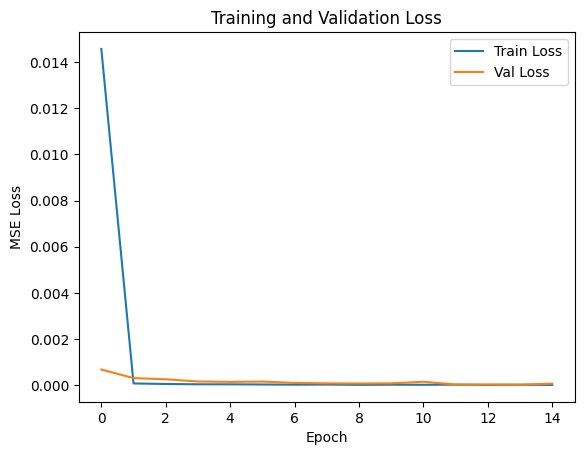

Test Loss: 0.000068

Example Prediction:
True theta1: 1.259, theta2: 16.993, v1: -0.021, v2: -11.234
Pred theta1: 1.250, theta2: 17.075, v1: -0.001, v2: -11.129


In [7]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 假设数据已经加载为以下形式：
t = data[:, 0]          # 时间戳（可忽略）
theta1 = data[:, 1]     # 摆1角度 (rad)
theta2 = data[:, 2]     # 摆2角度 (rad)
v1 = data[:, 3]         # 摆1角速度 (rad/s)
v2 = data[:, 4]         # 摆2角速度 (rad/s)

# --------------------
# 1. 数据预处理
# --------------------
# 提取特征 (theta1, theta2, v1, v2)
features = data[:, 1:5]  # shape: (num_samples, 4)

# 归一化（按特征维度归一化到 [-1, 1]）
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(features)

# 定义序列长度和预测步长
seq_length = 50    # 输入序列长度（历史时间步）
pred_steps = 1     # 预测未来1步（单步预测）

# 创建滑动窗口数据集
def create_sequences(data, seq_length, pred_steps):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_steps + 1):
        X.append(data[i:i+seq_length])                     # 输入序列
        y.append(data[i+seq_length:i+seq_length+pred_steps])  # 输出序列
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, seq_length, pred_steps)

# 数据集划分（按时间顺序）
train_ratio, val_ratio = 0.7, 0.15
train_size = int(len(X) * train_ratio)
val_size = int(len(X) * val_ratio)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# 转换为PyTorch张量
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).squeeze(1)  # 压缩pred_steps维度（单步预测）
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val).squeeze(1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).squeeze(1)

# 创建DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# --------------------
# 2. 定义LSTM模型
# --------------------
class DoublePendulumLSTM(nn.Module):
    def __init__(self, input_size=4, hidden_size=64, output_size=4, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out, _ = self.lstm(x)        # out shape: (batch_size, seq_length, hidden_size)
        out = self.fc(out[:, -1, :])  # 取最后一个时间步的输出
        return out

model = DoublePendulumLSTM(input_size=4, hidden_size=64, output_size=4, num_layers=2)
print(model)

# --------------------
# 3. 训练模型
# --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)

num_epochs = 15
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # 验证阶段
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            epoch_val_loss += loss.item()
    val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(val_loss)
    scheduler.step(val_loss)
    
    # 打印损失
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

# --------------------
# 4. 评估与可视化
# --------------------
# 绘制训练曲线
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# 测试集评估
model.eval()
test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        test_loss += loss.item()
test_loss /= len(val_loader)
print(f"Test Loss: {test_loss:.6f}")

# 示例预测可视化（取测试集第一个样本）
sample_idx = 0
X_sample = X_test[sample_idx].unsqueeze(0).to(device)
y_true = y_test[sample_idx].numpy()
y_pred = model(X_sample).cpu().detach().numpy().flatten()

# 反归一化
y_true = scaler.inverse_transform(y_true.reshape(1, -1))
y_pred = scaler.inverse_transform(y_pred.reshape(1, -1))

# 打印预测结果
print("\nExample Prediction:")
print(f"True theta1: {y_true[0, 0]:.3f}, theta2: {y_true[0, 1]:.3f}, v1: {y_true[0, 2]:.3f}, v2: {y_true[0, 3]:.3f}")
print(f"Pred theta1: {y_pred[0, 0]:.3f}, theta2: {y_pred[0, 1]:.3f}, v1: {y_pred[0, 2]:.3f}, v2: {y_pred[0, 3]:.3f}")

DoublePendulumRNN(
  (rnn): RNN(4, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=4, bias=True)
)


d:\Python 3.11.5\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/15 | Train Loss: 0.006655 | Val Loss: 0.000644
Epoch 2/15 | Train Loss: 0.000108 | Val Loss: 0.000259
Epoch 3/15 | Train Loss: 0.000057 | Val Loss: 0.000159
Epoch 4/15 | Train Loss: 0.000032 | Val Loss: 0.000088
Epoch 5/15 | Train Loss: 0.000023 | Val Loss: 0.000080
Epoch 6/15 | Train Loss: 0.000024 | Val Loss: 0.000055
Epoch 7/15 | Train Loss: 0.000017 | Val Loss: 0.000056
Epoch 8/15 | Train Loss: 0.000023 | Val Loss: 0.000107
Epoch 9/15 | Train Loss: 0.000018 | Val Loss: 0.000022
Epoch 10/15 | Train Loss: 0.000023 | Val Loss: 0.000038
Epoch 11/15 | Train Loss: 0.000009 | Val Loss: 0.000027
Epoch 12/15 | Train Loss: 0.000014 | Val Loss: 0.000041
Epoch 13/15 | Train Loss: 0.000018 | Val Loss: 0.000021
Epoch 14/15 | Train Loss: 0.000016 | Val Loss: 0.000009
Epoch 15/15 | Train Loss: 0.000018 | Val Loss: 0.000037


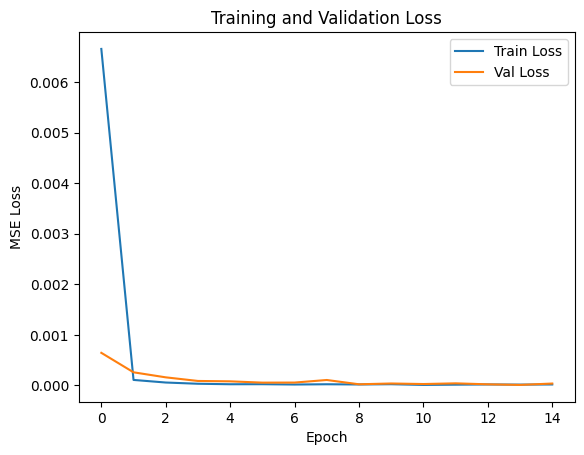

Test Loss: 0.000037

Example Prediction:
True theta1: 1.259, theta2: 16.993, v1: -0.021, v2: -11.234
Pred theta1: 1.255, theta2: 17.094, v1: 0.027, v2: -11.063


In [8]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 假设数据已经加载为以下形式：
t = data[:, 0]          # 时间戳（可忽略）
theta1 = data[:, 1]     # 摆1角度 (rad)
theta2 = data[:, 2]     # 摆2角度 (rad)
v1 = data[:, 3]         # 摆1角速度 (rad/s)
v2 = data[:, 4]         # 摆2角速度 (rad/s)

# --------------------
# 1. 数据预处理
# --------------------
# 提取特征 (theta1, theta2, v1, v2)
features = data[:, 1:5]  # shape: (num_samples, 4)

# 归一化（按特征维度归一化到 [-1, 1]）
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(features)

# 定义序列长度和预测步长
seq_length = 50    # 输入序列长度（历史时间步）
pred_steps = 1     # 预测未来1步（单步预测）

# 创建滑动窗口数据集
def create_sequences(data, seq_length, pred_steps):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_steps + 1):
        X.append(data[i:i+seq_length])                     # 输入序列
        y.append(data[i+seq_length:i+seq_length+pred_steps])  # 输出序列
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, seq_length, pred_steps)

# 数据集划分（按时间顺序）
train_ratio, val_ratio = 0.7, 0.15
train_size = int(len(X) * train_ratio)
val_size = int(len(X) * val_ratio)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# 转换为PyTorch张量
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).squeeze(1)  # 压缩pred_steps维度（单步预测）
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val).squeeze(1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).squeeze(1)

# 创建DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# --------------------
# 2. 定义RNN模型
# --------------------
class DoublePendulumRNN(nn.Module):
    def __init__(self, input_size=4, hidden_size=64, output_size=4, num_layers=2):
        super().__init__()
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out, _ = self.rnn(x)        # out shape: (batch_size, seq_length, hidden_size)
        out = self.fc(out[:, -1, :])  # 取最后一个时间步的输出
        return out

model = DoublePendulumRNN(input_size=4, hidden_size=64, output_size=4, num_layers=2)
print(model)

# --------------------
# 3. 训练模型
# --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)

num_epochs = 15
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # 验证阶段
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            epoch_val_loss += loss.item()
    val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(val_loss)
    scheduler.step(val_loss)
    
    # 打印损失
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

# --------------------
# 4. 评估与可视化
# --------------------
# 绘制训练曲线
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# 测试集评估
model.eval()
test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        test_loss += loss.item()
test_loss /= len(val_loader)
print(f"Test Loss: {test_loss:.6f}")

# 示例预测可视化（取测试集第一个样本）
sample_idx = 0
X_sample = X_test[sample_idx].unsqueeze(0).to(device)
y_true = y_test[sample_idx].numpy()
y_pred = model(X_sample).cpu().detach().numpy().flatten()

# 反归一化
y_true = scaler.inverse_transform(y_true.reshape(1, -1))
y_pred = scaler.inverse_transform(y_pred.reshape(1, -1))

# 打印预测结果
print("\nExample Prediction:")
print(f"True theta1: {y_true[0, 0]:.3f}, theta2: {y_true[0, 1]:.3f}, v1: {y_true[0, 2]:.3f}, v2: {y_true[0, 3]:.3f}")
print(f"Pred theta1: {y_pred[0, 0]:.3f}, theta2: {y_pred[0, 1]:.3f}, v1: {y_pred[0, 2]:.3f}, v2: {y_pred[0, 3]:.3f}")

DoublePendulumLSTM(
  (lstm): LSTM(4, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=4, bias=True)
)


d:\Python 3.11.5\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/200 | Train Loss: 187.345475 | Val Loss: 184.337357
Epoch 2/200 | Train Loss: 191.276801 | Val Loss: 184.310760
Epoch 3/200 | Train Loss: 191.247285 | Val Loss: 184.259567
Epoch 4/200 | Train Loss: 190.260832 | Val Loss: 184.180176
Epoch 5/200 | Train Loss: 190.972561 | Val Loss: 182.264445
Epoch 6/200 | Train Loss: 184.864994 | Val Loss: 178.261139
Epoch 7/200 | Train Loss: 180.121206 | Val Loss: 170.694987
Epoch 8/200 | Train Loss: 167.786353 | Val Loss: 155.465846
Epoch 9/200 | Train Loss: 149.315069 | Val Loss: 138.770289
Epoch 10/200 | Train Loss: 137.953738 | Val Loss: 124.524930
Epoch 11/200 | Train Loss: 128.005645 | Val Loss: 112.225380
Epoch 12/200 | Train Loss: 115.730162 | Val Loss: 103.985621
Epoch 13/200 | Train Loss: 111.713239 | Val Loss: 97.640249
Epoch 14/200 | Train Loss: 102.472206 | Val Loss: 93.253873
Epoch 15/200 | Train Loss: 98.841528 | Val Loss: 89.723185
Epoch 16/200 | Train Loss: 96.988779 | Val Loss: 87.566004
Epoch 17/200 | Train Loss: 98.477305 | 

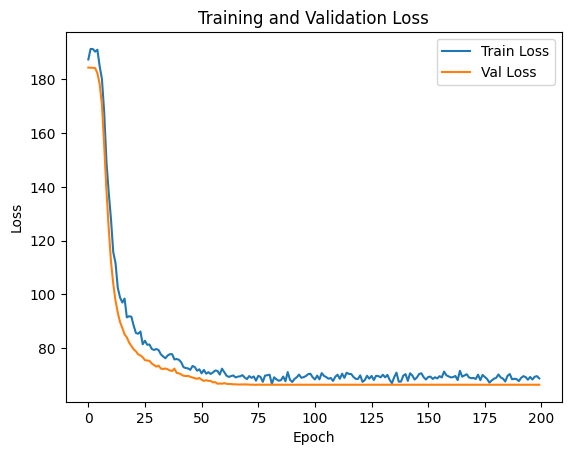

Test Loss: 66.426024

Example Prediction:
True theta1: 0.377, theta2: 0.502, v1: 0.661, v2: 0.681
Pred theta1: 0.545, theta2: 0.502, v1: -0.127, v2: 5.272


In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 假设数据已经加载为以下形式：
data = np.random.rand(1000, 5)
t = data[:, 0]          # 时间戳（可忽略）
theta1 = data[:, 1]     # 摆1角度 (rad)
theta2 = data[:, 2]     # 摆2角度 (rad)
v1 = data[:, 3]         # 摆1角速度 (rad/s)
v2 = data[:, 4]         # 摆2角速度 (rad/s)

# --------------------
# 1. 数据预处理
# --------------------
# 提取特征 (theta1, theta2, v1, v2)
features = data[:, 1:5]  # shape: (num_samples, 4)

# 归一化（按特征维度归一化到 [-1, 1]）
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(features)

# 定义序列长度和预测步长
seq_length = 50    # 输入序列长度（历史时间步）
pred_steps = 1     # 预测未来1步（单步预测）

# 创建滑动窗口数据集
def create_sequences(data, seq_length, pred_steps):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_steps + 1):
        X.append(data[i:i+seq_length])                     # 输入序列
        y.append(data[i+seq_length:i+seq_length+pred_steps])  # 输出序列
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, seq_length, pred_steps)

# 数据集划分（按时间顺序）
train_ratio, val_ratio = 0.7, 0.15
train_size = int(len(X) * train_ratio)
val_size = int(len(X) * val_ratio)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# 转换为PyTorch张量
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).squeeze(1)  # 压缩pred_steps维度（单步预测）
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val).squeeze(1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).squeeze(1)

# 创建DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# --------------------
# 2. 定义LSTM模型
# --------------------
class DoublePendulumLSTM(nn.Module):
    def __init__(self, input_size=4, hidden_size=64, output_size=4, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)        # out shape: (batch_size, seq_length, hidden_size)
        out = self.fc(out[:, -1, :])  # 取最后一个时间步的输出
        return out

model = DoublePendulumLSTM(input_size=4, hidden_size=64, output_size=4, num_layers=2)
print(model)

# 定义混沌摆的物理方程
def double_pendulum_equations(state):
    theta1, theta2, v1, v2 = state[:, 0], state[:, 1], state[:, 2], state[:, 3]
    dtheta = theta1 - theta2  # Δ = θ₁ - θ₂

    l1, l2 = 2.0, 1.0       # 摆长 (m)
    m1, m2 = 5.0, 2.0       # 质量 (kg)
    g = 9.81      # 重力加速度 (m/s²)

    # 定义常量（转动惯量相关系数）
    A1 = m1 * l1**2 / 3 + m2 * l1**2         # A₁ = m₁*l₁²/3 + m₂*l₁²
    A2 = m2 * l2**2 / 3                       # A₂ = m₂*l₂²/3
    B  = m2 * l1 * l2 / 2                     # B   = m₂*l₁*l₂/2

    # 构造右端项
    f1 = - g * (m1*l1/2 + m2*l1) * torch.sin(theta1) - B * torch.sin(dtheta) * (v2**2)
    f2 =   B * torch.sin(dtheta) * (v1**2) + g * (m2*l2/2) * torch.sin(theta2)

    # 系数矩阵的行列式
    denom = A1 * A2 - (B * torch.cos(dtheta))**2

    # 解耦后计算角加速度
    ddot_theta1 = (A2 * f1 - B * torch.cos(dtheta) * f2) / denom
    ddot_theta2 = (-B * torch.cos(dtheta) * f1 + A1 * f2) / denom

    return torch.stack([v1, v2, ddot_theta1, ddot_theta2], dim=1)

# 定义PINN的损失函数
def pinn_loss(y_pred, y_true, model_output):
    mse_loss = nn.MSELoss()(y_pred, y_true)
    physics_output = double_pendulum_equations(model_output)
    # 只比较角加速度部分
    physics_loss = nn.MSELoss()(model_output[:, -2:], physics_output[:, -2:])
    return mse_loss + physics_loss

# --------------------
# 3. 训练模型
# --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)

num_epochs = 200
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        model_output = torch.cat([X_batch[:, -1, :], y_pred], dim=1)  # 拼接输入和输出

        loss = pinn_loss(y_pred, y_batch, model_output)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(train_loss)

    # 验证阶段
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            model_output = torch.cat([X_batch[:, -1, :], y_pred], dim=1)  # 拼接输入和输出

            loss = pinn_loss(y_pred, y_batch, model_output)
            epoch_val_loss += loss.item()
    val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(val_loss)
    scheduler.step(val_loss)

    # 打印损失
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

# --------------------
# 4. 评估与可视化
# --------------------
# 绘制训练曲线
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# 测试集评估
model.eval()
test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        model_output = torch.cat([X_batch[:, -1, :], y_pred], dim=1)  # 拼接输入和输出

        loss = pinn_loss(y_pred, y_batch, model_output)
        test_loss += loss.item()
    test_loss /= len(val_loader)
    print(f"Test Loss: {test_loss:.6f}")

# 示例预测可视化（取测试集第一个样本）
sample_idx = 0
X_sample = X_test[sample_idx].unsqueeze(0).to(device)
y_true = y_test[sample_idx].numpy()
y_pred = model(X_sample).cpu().detach().numpy().flatten()

# 反归一化
y_true = scaler.inverse_transform(y_true.reshape(1, -1))
y_pred = scaler.inverse_transform(y_pred.reshape(1, -1))

# 打印预测结果
print("\nExample Prediction:")
print(f"True theta1: {y_true[0, 0]:.3f}, theta2: {y_true[0, 1]:.3f}, v1: {y_true[0, 2]:.3f}, v2: {y_true[0, 3]:.3f}")
print(f"Pred theta1: {y_pred[0, 0]:.3f}, theta2: {y_pred[0, 1]:.3f}, v1: {y_pred[0, 2]:.3f}, v2: {y_pred[0, 3]:.3f}")    

DoublePendulumFCNN(
  (fc1): Linear(in_features=200, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)
Epoch 1/200 | Train Loss: 178.900610 | Val Loss: 176.494278
Epoch 2/200 | Train Loss: 176.087745 | Val Loss: 176.450500
Epoch 3/200 | Train Loss: 183.656050 | Val Loss: 176.415538
Epoch 4/200 | Train Loss: 172.469384 | Val Loss: 176.372492
Epoch 5/200 | Train Loss: 175.059058 | Val Loss: 176.338450
Epoch 6/200 | Train Loss: 175.846212 | Val Loss: 176.292898


d:\Python 3.11.5\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 7/200 | Train Loss: 174.233704 | Val Loss: 176.238948
Epoch 8/200 | Train Loss: 181.707585 | Val Loss: 176.182851
Epoch 9/200 | Train Loss: 176.014438 | Val Loss: 176.111308
Epoch 10/200 | Train Loss: 175.590937 | Val Loss: 176.033305
Epoch 11/200 | Train Loss: 176.765547 | Val Loss: 175.956726
Epoch 12/200 | Train Loss: 174.310974 | Val Loss: 175.861725
Epoch 13/200 | Train Loss: 175.697863 | Val Loss: 175.749273
Epoch 14/200 | Train Loss: 175.017431 | Val Loss: 175.634979
Epoch 15/200 | Train Loss: 177.880456 | Val Loss: 175.499578
Epoch 16/200 | Train Loss: 174.596946 | Val Loss: 175.302968
Epoch 17/200 | Train Loss: 169.976691 | Val Loss: 175.121063
Epoch 18/200 | Train Loss: 172.939933 | Val Loss: 174.920822
Epoch 19/200 | Train Loss: 169.155595 | Val Loss: 174.661026
Epoch 20/200 | Train Loss: 168.816236 | Val Loss: 174.391886
Epoch 21/200 | Train Loss: 174.897181 | Val Loss: 174.092158
Epoch 22/200 | Train Loss: 170.893118 | Val Loss: 173.752238
Epoch 23/200 | Train Loss: 

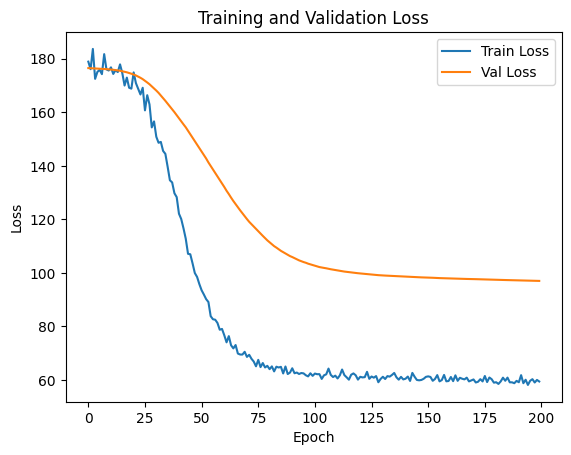

Test Loss: 97.000946

Example Prediction:
True theta1: 0.259, theta2: 0.528, v1: 0.695, v2: 0.378
Pred theta1: 0.521, theta2: 0.542, v1: -1.135, v2: 3.754


In [22]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 假设数据已经加载为以下形式：
# 这里 data 未定义，实际使用时需要替换为真实数据
data = np.random.rand(1000, 5)
t = data[:, 0]          # 时间戳（可忽略）
theta1 = data[:, 1]     # 摆1角度 (rad)
theta2 = data[:, 2]     # 摆2角度 (rad)
v1 = data[:, 3]         # 摆1角速度 (rad/s)
v2 = data[:, 4]         # 摆2角速度 (rad/s)

# --------------------
# 1. 数据预处理
# --------------------
# 提取特征 (theta1, theta2, v1, v2)
features = data[:, 1:5]  # shape: (num_samples, 4)

# 归一化（按特征维度归一化到 [-1, 1]）
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(features)

# 定义序列长度和预测步长
seq_length = 50    # 输入序列长度（历史时间步）
pred_steps = 1     # 预测未来1步（单步预测）

# 创建滑动窗口数据集
def create_sequences(data, seq_length, pred_steps):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_steps + 1):
        X.append(data[i:i+seq_length])                     # 输入序列
        y.append(data[i+seq_length:i+seq_length+pred_steps])  # 输出序列
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, seq_length, pred_steps)

# 数据集划分（按时间顺序）
train_ratio, val_ratio = 0.7, 0.15
train_size = int(len(X) * train_ratio)
val_size = int(len(X) * val_ratio)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

# 转换为PyTorch张量
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).squeeze(1)  # 压缩pred_steps维度（单步预测）
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val).squeeze(1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).squeeze(1)

# 展平输入数据以适应全连接网络
X_train = X_train.view(X_train.size(0), -1)
X_val = X_val.view(X_val.size(0), -1)
X_test = X_test.view(X_test.size(0), -1)

# 创建DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# --------------------
# 2. 定义全连接神经网络模型
# --------------------
class DoublePendulumFCNN(nn.Module):
    def __init__(self, input_size=4 * seq_length, hidden_size=128, output_size=4):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

model = DoublePendulumFCNN(input_size=4 * seq_length, hidden_size=128, output_size=4)
print(model)

# 定义混沌摆的物理方程
def double_pendulum_equations(state):
    theta1, theta2, v1, v2 = state[:, 0], state[:, 1], state[:, 2], state[:, 3]
    dtheta = theta1 - theta2  # Δ = θ₁ - θ₂

    l1, l2 = 2.0, 1.0       # 摆长 (m)
    m1, m2 = 5.0, 2.0       # 质量 (kg)
    g = 9.81      # 重力加速度 (m/s²)

    # 定义常量（转动惯量相关系数）
    A1 = m1 * l1**2 / 3 + m2 * l1**2         # A₁ = m₁*l₁²/3 + m₂*l₁²
    A2 = m2 * l2**2 / 3                       # A₂ = m₂*l₂²/3
    B  = m2 * l1 * l2 / 2                     # B   = m₂*l₁*l₂/2

    # 构造右端项
    f1 = - g * (m1*l1/2 + m2*l1) * torch.sin(theta1) - B * torch.sin(dtheta) * (v2**2)
    f2 =   B * torch.sin(dtheta) * (v1**2) + g * (m2*l2/2) * torch.sin(theta2)

    # 系数矩阵的行列式
    denom = A1 * A2 - (B * torch.cos(dtheta))**2

    # 解耦后计算角加速度
    ddot_theta1 = (A2 * f1 - B * torch.cos(dtheta) * f2) / denom
    ddot_theta2 = (-B * torch.cos(dtheta) * f1 + A1 * f2) / denom

    return torch.stack([v1, v2, ddot_theta1, ddot_theta2], dim=1)

# 定义PINN的损失函数
def pinn_loss(y_pred, y_true, model_output):
    mse_loss = nn.MSELoss()(y_pred, y_true)
    physics_output = double_pendulum_equations(model_output)
    # 只比较角加速度部分
    physics_loss = nn.MSELoss()(model_output[:, -2:], physics_output[:, -2:])
    return mse_loss + physics_loss

# --------------------
# 3. 训练模型
# --------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # 降低学习率
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)

num_epochs = 200  # 增加训练轮数
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        model_output = torch.cat([X_batch[:, -4:], y_pred], dim=1)  # 拼接输入和输出

        loss = pinn_loss(y_pred, y_batch, model_output)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(train_loss)

    # 验证阶段
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            model_output = torch.cat([X_batch[:, -4:], y_pred], dim=1)  # 拼接输入和输出

            loss = pinn_loss(y_pred, y_batch, model_output)
            epoch_val_loss += loss.item()
    val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(val_loss)
    scheduler.step(val_loss)

    # 打印损失
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

# --------------------
# 4. 评估与可视化
# --------------------
# 绘制训练曲线
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

# 测试集评估
model.eval()
test_loss = 0
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        model_output = torch.cat([X_batch[:, -4:], y_pred], dim=1)  # 拼接输入和输出

        loss = pinn_loss(y_pred, y_batch, model_output)
        test_loss += loss.item()
    test_loss /= len(val_loader)
    print(f"Test Loss: {test_loss:.6f}")

# 示例预测可视化（取测试集第一个样本）
sample_idx = 0
X_sample = X_test[sample_idx].unsqueeze(0).to(device)
y_true = y_test[sample_idx].numpy()
y_pred = model(X_sample).cpu().detach().numpy().flatten()

# 反归一化
y_true = scaler.inverse_transform(y_true.reshape(1, -1))
y_pred = scaler.inverse_transform(y_pred.reshape(1, -1))

# 打印预测结果
print("\nExample Prediction:")
print(f"True theta1: {y_true[0, 0]:.3f}, theta2: {y_true[0, 1]:.3f}, v1: {y_true[0, 2]:.3f}, v2: {y_true[0, 3]:.3f}")
print(f"Pred theta1: {y_pred[0, 0]:.3f}, theta2: {y_pred[0, 1]:.3f}, v1: {y_pred[0, 2]:.3f}, v2: {y_pred[0, 3]:.3f}")    

d:\Python 3.11.5\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/30 | Train Loss: 2225.547735 | Val Loss: 1050.037435
Epoch 2/30 | Train Loss: 639.324584 | Val Loss: 314.214274
Epoch 3/30 | Train Loss: 223.000827 | Val Loss: 171.499791
Epoch 4/30 | Train Loss: 86.248205 | Val Loss: 98.566414
Epoch 5/30 | Train Loss: 53.218315 | Val Loss: 40.239634
Epoch 6/30 | Train Loss: 39.130866 | Val Loss: 36.182550
Epoch 7/30 | Train Loss: 30.952574 | Val Loss: 27.673339
Epoch 8/30 | Train Loss: 26.043789 | Val Loss: 27.820295
Epoch 9/30 | Train Loss: 22.346300 | Val Loss: 23.218759
Epoch 10/30 | Train Loss: 21.039188 | Val Loss: 23.136820
Epoch 11/30 | Train Loss: 18.883981 | Val Loss: 19.932660
Epoch 12/30 | Train Loss: 16.886296 | Val Loss: 17.866669
Epoch 13/30 | Train Loss: 15.319303 | Val Loss: 17.364896
Epoch 14/30 | Train Loss: 15.593997 | Val Loss: 16.855285
Epoch 15/30 | Train Loss: 13.612219 | Val Loss: 15.298068
Epoch 16/30 | Train Loss: 13.140769 | Val Loss: 15.746994
Epoch 17/30 | Train Loss: 12.393788 | Val Loss: 14.048858
Epoch 18/30 | T

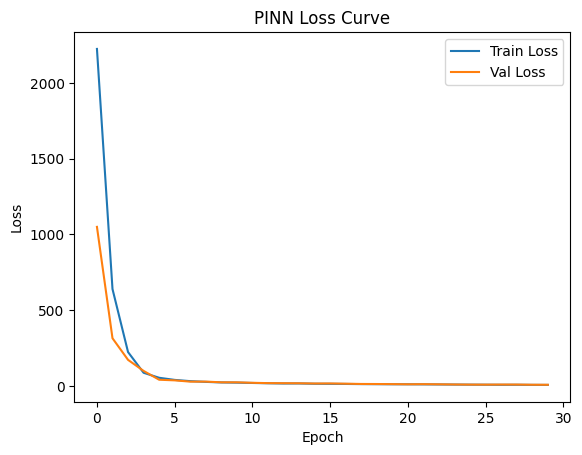


Example Prediction:
True theta1: 0.259, theta2: 0.528, v1: 0.695, v2: 0.378
Pred theta1: 0.573, theta2: 0.374, v1: 0.497, v2: 0.508


In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# --------------------
# 0. 加载数据
# --------------------

t = data[:, 0]          # 时间戳（可选）
theta1 = data[:, 1]     # 摆1角度
theta2 = data[:, 2]     # 摆2角度
v1 = data[:, 3]         # 摆1角速度
v2 = data[:, 4]         # 摆2角速度
features = data[:, 1:5]

# --------------------
# 1. 数据预处理
# --------------------
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(features)

seq_length = 50
pred_steps = 1

def create_sequences(data, seq_length, pred_steps):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_steps + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, seq_length, pred_steps)

train_ratio, val_ratio = 0.7, 0.15
train_size = int(len(X) * train_ratio)
val_size = int(len(X) * val_ratio)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=64)

# --------------------
# 2. 定义PINN模型
# --------------------
class PINN(nn.Module):
    def __init__(self, input_size=4, hidden_size=64, output_size=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.net(x[:, -1, :])  # 只用最后一个时间步作为输入（也可尝试均值池化）

model = PINN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --------------------
# 3. 定义物理损失函数
# --------------------
g = 9.81
m1, m2 = 1.0, 1.0
l1, l2 = 1.0, 1.0

def physics_loss(pred, input):
    θ1, θ2, v1, v2 = torch.split(pred, 1, dim=1)

    θ1 = θ1 * np.pi       # 反归一化近似（或使用 scaler 反归一化）
    θ2 = θ2 * np.pi
    v1 = v1 * 10
    v2 = v2 * 10

    Δ = θ2 - θ1

    # 拉格朗日法的加速度
    a1_phys = (-g * (2 * torch.sin(θ1)) - torch.sin(Δ) * (v2**2 * l2 + v1**2 * l1 * torch.cos(Δ))) / \
              (2 * l1 - l1 * torch.cos(2*Δ))
    a2_phys = (2 * torch.sin(Δ) * (v1**2 * l1 * m1 + g * m1 * torch.cos(θ1) + v2**2 * l2 * m2 * torch.cos(Δ))) / \
              (l2 * (2 * m1 - m2 * torch.cos(2*Δ)))

    # 假设当前预测出的 v1, v2 是正向 Euler 推进后的结果，用近似微分获得加速度
    dt = 0.02
    prev_input = input[:, -1, :]
    v1_prev, v2_prev = prev_input[:, 2:3], prev_input[:, 3:4]
    a1_pred = (v1 - v1_prev) / dt
    a2_pred = (v2 - v2_prev) / dt

    loss_a1 = torch.mean((a1_pred - a1_phys)**2)
    loss_a2 = torch.mean((a2_pred - a2_phys)**2)

    return loss_a1 + loss_a2

# --------------------
# 4. 总训练循环
# --------------------
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)

train_losses, val_losses = [], []
num_epochs = 30
λ_phys = 1.0  # 可调节物理损失权重

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss_mse = criterion(y_pred, y_batch)
        loss_phys = physics_loss(y_pred, X_batch)
        loss = loss_mse + λ_phys * loss_phys
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    train_loss = total_train_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss_mse = criterion(y_pred, y_batch)
            loss_phys = physics_loss(y_pred, X_batch)
            loss = loss_mse + λ_phys * loss_phys
            total_val_loss += loss.item()

    val_loss = total_val_loss / len(val_loader)
    val_losses.append(val_loss)
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

# --------------------
# 5. 可视化结果
# --------------------
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("PINN Loss Curve")
plt.show()

# --------------------
# 6. 预测与反归一化
# --------------------
model.eval()
sample_idx = 0
X_sample = X_test[sample_idx].unsqueeze(0).to(device)
y_true = y_test[sample_idx].numpy()
y_pred = model(X_sample).cpu().detach().numpy().flatten()

y_true = scaler.inverse_transform(y_true.reshape(1, -1))
y_pred = scaler.inverse_transform(y_pred.reshape(1, -1))

print("\nExample Prediction:")
print(f"True theta1: {y_true[0, 0]:.3f}, theta2: {y_true[0, 1]:.3f}, v1: {y_true[0, 2]:.3f}, v2: {y_true[0, 3]:.3f}")
print(f"Pred theta1: {y_pred[0, 0]:.3f}, theta2: {y_pred[0, 1]:.3f}, v1: {y_pred[0, 2]:.3f}, v2: {y_pred[0, 3]:.3f}")


d:\Python 3.11.5\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100 | Train Loss: 15.553028 | Val Loss: 4.308706
Epoch 2/100 | Train Loss: 3.036758 | Val Loss: 0.868095
Epoch 3/100 | Train Loss: 0.551717 | Val Loss: 0.344561
Epoch 4/100 | Train Loss: 0.334949 | Val Loss: 0.317800
Epoch 5/100 | Train Loss: 0.307784 | Val Loss: 0.315368
Epoch 6/100 | Train Loss: 0.297169 | Val Loss: 0.302568
Epoch 7/100 | Train Loss: 0.277036 | Val Loss: 0.307070
Epoch 8/100 | Train Loss: 0.270828 | Val Loss: 0.291842
Epoch 9/100 | Train Loss: 0.265049 | Val Loss: 0.263415
Epoch 10/100 | Train Loss: 0.248796 | Val Loss: 0.250810
Epoch 11/100 | Train Loss: 0.237545 | Val Loss: 0.312063
Epoch 12/100 | Train Loss: 0.232564 | Val Loss: 0.235074
Epoch 13/100 | Train Loss: 0.231109 | Val Loss: 0.232166
Epoch 14/100 | Train Loss: 0.213678 | Val Loss: 0.227888
Epoch 15/100 | Train Loss: 0.209091 | Val Loss: 0.212277
Epoch 16/100 | Train Loss: 0.204853 | Val Loss: 0.211930
Epoch 17/100 | Train Loss: 0.196835 | Val Loss: 0.208191
Epoch 18/100 | Train Loss: 0.203047 | V

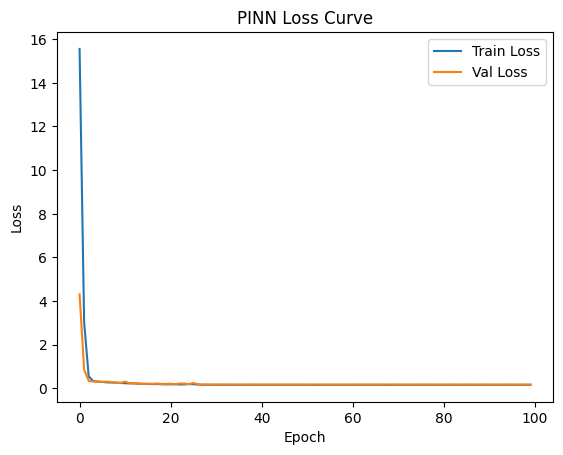


Example Prediction:
True theta1: 1.454, theta2: -1.376, v1: -6.065, v2: 1.726
Pred theta1: 0.117, theta2: -0.297, v1: -136.479, v2: -442.163


In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# --------------------
# 0. 加载数据
# --------------------
data = np.loadtxt("E:\学习\大三下\机器学习物理实验\hw2\output.txt", delimiter=" ") 
theta1 = data[:, 1]     # 摆1角度
theta2 = data[:, 2]     # 摆2角度
v1 = data[:, 3]         # 摆1角速度
v2 = data[:, 4]         # 摆2角速度
features = data[:, 1:5]

# --------------------
# 1. 数据预处理
# --------------------
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_features = scaler.fit_transform(features)

seq_length = 50
pred_steps = 1

def create_sequences(data, seq_length, pred_steps):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_steps + 1):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, seq_length, pred_steps)

train_ratio, val_ratio = 0.7, 0.15
train_size = int(len(X) * train_ratio)
val_size = int(len(X) * val_ratio)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=64)

# --------------------
# 2. 定义PINN模型
# --------------------
class PINN(nn.Module):
    def __init__(self, input_size=4, hidden_size=64, output_size=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.net(x[:, -1, :])  # 只用最后一个时间步作为输入

model = PINN()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --------------------
# 3. 定义物理损失函数
# --------------------
g = 9.81
m1, m2 = 1.0, 1.0
l1, l2 = 1.0, 1.0

def physics_loss(pred, input):
    θ1, θ2, v1, v2 = torch.split(pred, 1, dim=1)

    θ1 = θ1 * np.pi       # 反归一化近似（或使用 scaler 反归一化）
    θ2 = θ2 * np.pi
    v1 = v1 * 10
    v2 = v2 * 10

    Δ = θ2 - θ1

    # 拉格朗日法的加速度推导近似
    a1_phys = (-g * (2 * torch.sin(θ1)) - torch.sin(Δ) * (v2**2 * l2 + v1**2 * l1 * torch.cos(Δ))) / \
              (2 * l1 - l1 * torch.cos(2*Δ))
    a2_phys = (2 * torch.sin(Δ) * (v1**2 * l1 * m1 + g * m1 * torch.cos(θ1) + v2**2 * l2 * m2 * torch.cos(Δ))) / \
              (l2 * (2 * m1 - m2 * torch.cos(2*Δ)))

    # 假设当前预测出的 v1, v2 是正向 Euler 推进后的结果，用近似微分获得加速度
    dt = 0.02
    prev_input = input[:, -1, :]
    v1_prev, v2_prev = prev_input[:, 2:3], prev_input[:, 3:4]
    a1_pred = (v1 - v1_prev) / dt
    a2_pred = (v2 - v2_prev) / dt

    loss_a1 = torch.mean((a1_pred - a1_phys)**2)
    loss_a2 = torch.mean((a2_pred - a2_phys)**2)

    return loss_a1 + loss_a2

# --------------------
# 4. 总训练循环
# --------------------
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)

train_losses, val_losses = [], []
num_epochs = 100
λ_phys = 0.5  # 可调节物理损失权重

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss_mse = criterion(y_pred, y_batch)
        loss_phys = physics_loss(y_pred, X_batch)
        loss = loss_mse + λ_phys * loss_phys
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    train_loss = total_train_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss_mse = criterion(y_pred, y_batch)
            loss_phys = physics_loss(y_pred, X_batch)
            loss = loss_mse + λ_phys * loss_phys
            total_val_loss += loss.item()

    val_loss = total_val_loss / len(val_loader)
    val_losses.append(val_loss)
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")

# --------------------
# 5. 可视化结果
# --------------------
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("PINN Loss Curve")
plt.show()

# --------------------
# 6. 预测与反归一化
# --------------------
model.eval()
sample_idx = 0
X_sample = X_test[sample_idx].unsqueeze(0).to(device)
y_true = y_test[sample_idx].numpy()
y_pred = model(X_sample).cpu().detach().numpy().flatten()

y_true = scaler.inverse_transform(y_true.reshape(1, -1))
y_pred = scaler.inverse_transform(y_pred.reshape(1, -1))

print("\nExample Prediction:")
print(f"True theta1: {y_true[0, 0]:.3f}, theta2: {y_true[0, 1]:.3f}, v1: {y_true[0, 2]:.3f}, v2: {y_true[0, 3]:.3f}")
print(f"Pred theta1: {y_pred[0, 0]:.3f}, theta2: {y_pred[0, 1]:.3f}, v1: {y_pred[0, 2]:.3f}, v2: {y_pred[0, 3]:.3f}")
